

**No action/Major action (r=-40)**

In [ ]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import progressbar
from FooEnv import FooEnv
real_time=0
env=FooEnv(real_time)
state_space_size = 3
action_space_size = 2
#Creating a q-table and intialising all values as 0
q_table = np.zeros((state_space_size,action_space_size))
num_episodes = 1000
max_steps_per_episode = 400
learning_rate = 0.1
discount_rate = 0.99
#Greedy strategy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = 0.01
rewards_all_episodes = [] 
cost_all_1= []
state_all=[]
major_count_all_1=[]
no_count_all_1=[]
#Q-Learning Algorithm
Count_step=np.array([])
for episode in range(num_episodes): #Contains that happens in an episode
  state = 0
  real_time = 0
  done = False #Tells us whether episode is finished
  rewards_current_episode = 0
  cost=0
  major_count=0
  no_count=0
  for step in range(max_steps_per_episode): #Contains that happens in a time step 
    real_time=real_time+1
    #Exploration-exploitation trade off
    exploration_rate_threshold = random.uniform(0,1)
    if state ==0:    
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 2)
    elif state ==1:
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 2)
    elif state ==2:
        action = 1
    new_state, reward, done = env.update_probability_matrix(state,action,real_time)
    if reward ==0:
      no_count=no_count+1
    elif reward ==-40:
      major_count=major_count+1
    #Update Q-table for Q(s,a)
    q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    state = new_state
    rewards_current_episode += reward
    cost+= -reward
    state_all = np.append(state_all, state)
    if done == True: #Checking if episode is over
      break
  # Exploration rate decay
  print("episode {} ".format(episode))
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)
  cost_all_1.append(cost)
  Count_step = np.append(Count_step, step)
  no_count_all_1=np.append(no_count_all_1, no_count)
  major_count_all_1=np.append(major_count_all_1, major_count)


episode 0 
episode 1 
episode 2 
episode 3 
episode 4 
episode 5 
episode 6 
episode 7 
episode 8 
episode 9 
episode 10 
episode 11 
episode 12 
episode 13 
episode 14 
episode 15 
episode 16 
episode 17 
episode 18 
episode 19 
episode 20 
episode 21 
episode 22 
episode 23 
episode 24 
episode 25 
episode 26 
episode 27 
episode 28 
episode 29 
episode 30 
episode 31 
episode 32 
episode 33 
episode 34 
episode 35 
episode 36 
episode 37 
episode 38 
episode 39 
episode 40 
episode 41 
episode 42 
episode 43 
episode 44 
episode 45 
episode 46 
episode 47 
episode 48 
episode 49 
episode 50 
episode 51 
episode 52 
episode 53 
episode 54 
episode 55 
episode 56 
episode 57 
episode 58 
episode 59 
episode 60 
episode 61 
episode 62 
episode 63 
episode 64 
episode 65 
episode 66 
episode 67 
episode 68 
episode 69 
episode 70 
episode 71 
episode 72 
episode 73 
episode 74 
episode 75 
episode 76 
episode 77 
episode 78 
episode 79 
episode 80 
episode 81 
episode 82 
episode 83 
ep

3.9275

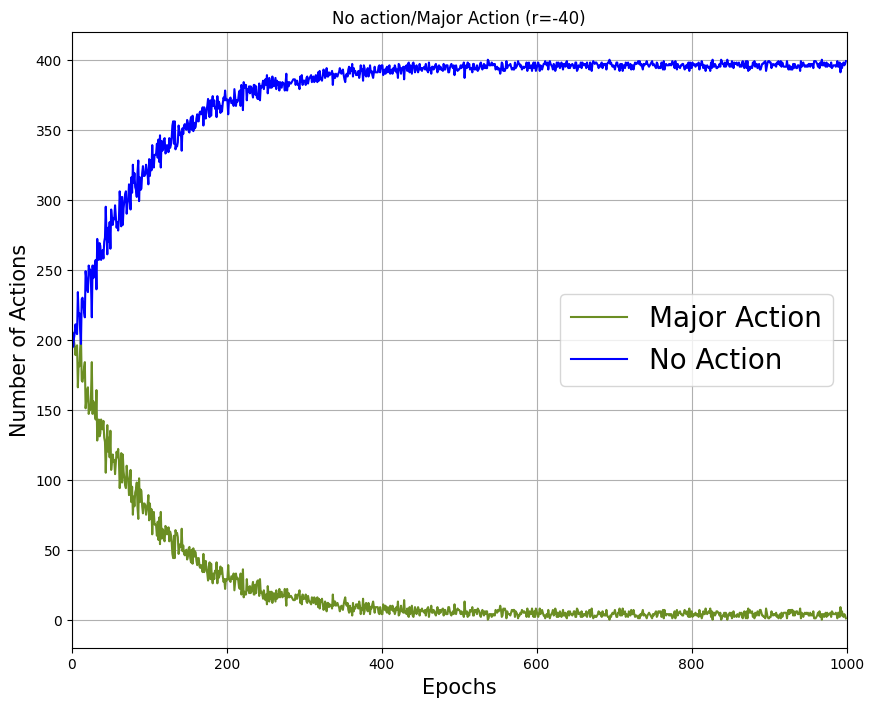

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Number of Actions", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(major_count_all_1, color='olivedrab', label="Major Action")
plt.plot(no_count_all_1, color='blue', label="No Action")
plt.title("No action/Major Action (r=-40)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')

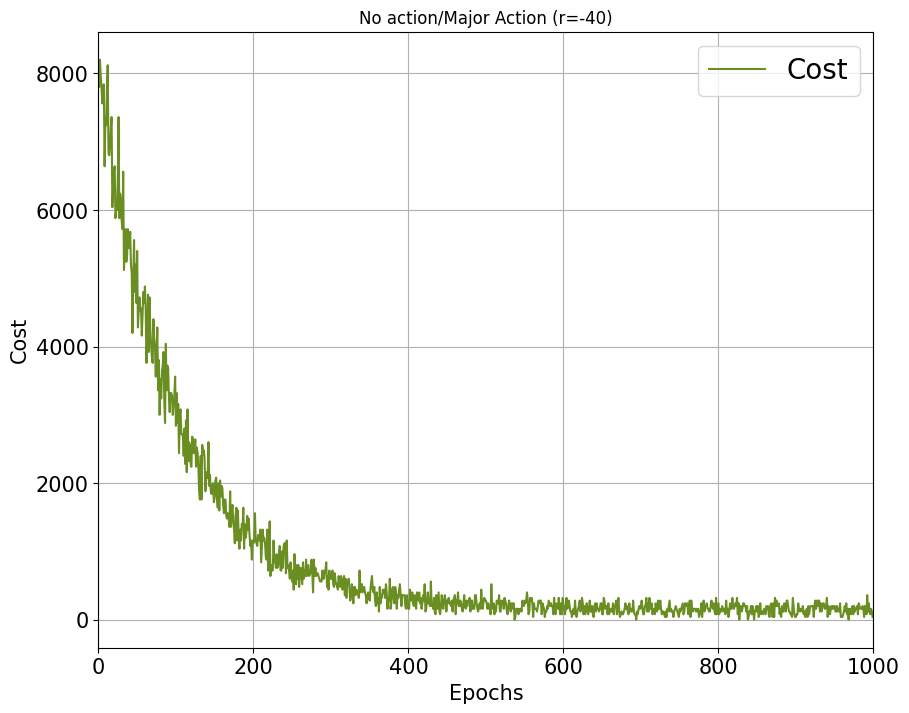

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Cost", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(cost_all_1, color='olivedrab', label="Cost")
plt.title("No action/Major Action (r=-40)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size


**No Action, Major Action(r=-40), Minor Action(r=-20)**



In [ ]:
import numpy as np
import gym
import random
import time
from IPython.display import clear_output
import progressbar
from FooEnv2 import FooEnv2
real_time=0
env2=FooEnv2(real_time)
state_space_size = 3
action_space_size = 3
q_table = np.zeros((state_space_size,action_space_size))
#Number of episodes
num_episodes = 1000
#Max number of steps per episode
max_steps_per_episode = 400
learning_rate = 0.1
discount_rate = 0.99
#Greedy strategy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = 0.01
rewards_all_episodes = [] #List to contain all the rewards of all the episodes given to the agent
cost_all_2= []
state_all=[]
major_count_all_2=[]
minor_count_all_2=[]
no_count_all_2=[]
#Q-Learning Algorithm
Count_step=np.array([])

for episode in range(num_episodes): #Contains that happens in an episode
  state = 0
  real_time = 0
  done = False #Tells us whether episode is finished
  rewards_current_episode = 0
  cost=0
  major_count=0
  minor_count=0
  no_count=0
  for step in range(max_steps_per_episode): #Contains that happens in a time step 
    real_time=real_time+1
    #Exploration-exploitation trade off
    exploration_rate_threshold = random.uniform(0,1)

    if state ==0:    
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 3)
    elif state ==1:
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 3)
    elif state ==2:
        action = 2
    new_state, reward, done = env2.update_probability_matrix(state,action,real_time)
    if reward ==0:
      no_count=no_count+1
    elif reward ==-20:
      minor_count=minor_count+1
    elif reward ==-40:
      major_count=major_count+1
    #Update Q-table for Q(s,a)
    q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    state = new_state
    rewards_current_episode += reward
    cost+= -reward
    state_all = np.append(state_all, state)
    if done == True: #Checking if episode is over
      break
  # Exploration rate decay
  print("episode {} ".format(episode))

  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)
  cost_all_2.append(cost)
  Count_step = np.append(Count_step, step)
  no_count_all_2=np.append(no_count_all_2, no_count)
  major_count_all_2=np.append(major_count_all_2, major_count)
  minor_count_all_2=np.append(minor_count_all_2, minor_count)




episode 0 
episode 1 
episode 2 
episode 3 
episode 4 
episode 5 
episode 6 
episode 7 
episode 8 
episode 9 
episode 10 
episode 11 
episode 12 
episode 13 
episode 14 
episode 15 
episode 16 
episode 17 
episode 18 
episode 19 
episode 20 
episode 21 
episode 22 
episode 23 
episode 24 
episode 25 
episode 26 
episode 27 
episode 28 
episode 29 
episode 30 
episode 31 
episode 32 
episode 33 
episode 34 
episode 35 
episode 36 
episode 37 
episode 38 
episode 39 
episode 40 
episode 41 
episode 42 
episode 43 
episode 44 
episode 45 
episode 46 
episode 47 
episode 48 
episode 49 
episode 50 
episode 51 
episode 52 
episode 53 
episode 54 
episode 55 
episode 56 
episode 57 
episode 58 
episode 59 
episode 60 
episode 61 
episode 62 
episode 63 
episode 64 
episode 65 
episode 66 
episode 67 
episode 68 
episode 69 
episode 70 
episode 71 
episode 72 
episode 73 
episode 74 
episode 75 
episode 76 
episode 77 
episode 78 
episode 79 
episode 80 
episode 81 
episode 82 
episode 83 
ep

396.0175
3.79
0.1925


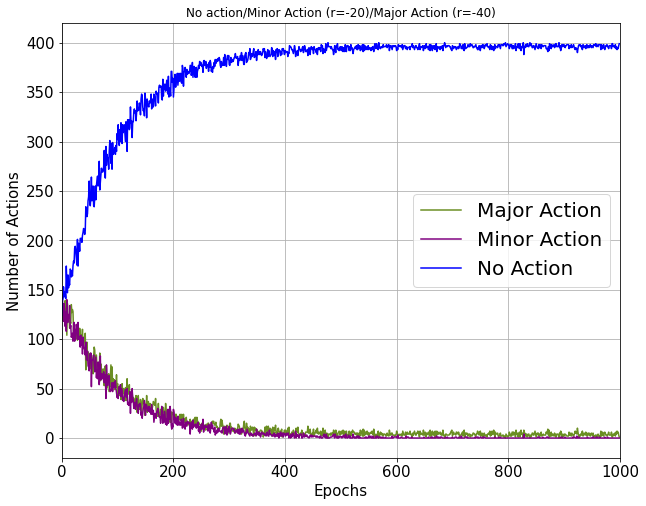

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Number of Actions", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.plot(major_count_all_2, color='olivedrab', label="Major Action")
plt.plot(minor_count_all_2, color='purple', label="Minor Action")
plt.plot(no_count_all_2, color='blue', label="No Action")
plt.title("No action/Minor Action (r=-20)/Major Action (r=-40)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size

print(np.mean(no_count_all_2[600:1000]))
print(np.mean(major_count_all_2[600:1000]))
print(np.mean(minor_count_all_2[600:1000]))


155.45

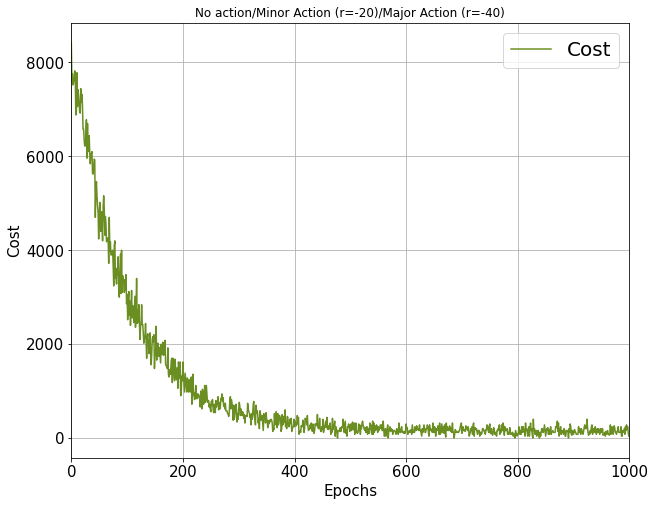

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Cost", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.plot(cost_all_2, color='olivedrab', label="Cost")
plt.title("No action/Minor Action (r=-20)/Major Action (r=-40)")

plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size
np.mean(cost_all_2[600:1000])

**No Action, Major Action(r=-25), Minor Action(r=-20)**


In [ ]:
import numpy as np
import random
import time
from IPython.display import clear_output
import progressbar
from FooEnv3 import FooEnv3
real_time=0
env3=FooEnv3(real_time)
state_space_size = 3
action_space_size = 3
#Creating a q-table and intialising all values as 0
q_table = np.zeros((state_space_size,action_space_size))
#Number of episodes
num_episodes = 1000
#Max number of steps per episode
max_steps_per_episode = 400
learning_rate = 0.1
discount_rate = 0.99
#Greedy strategy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = 0.01
rewards_all_episodes = [] #List to contain all the rewards of all the episodes given to the agent
cost_all_3= []
state_all=[]
major_count_all_3=[]
minor_count_all_3=[]
no_count_all_3=[]
#Q-Learning Algorithm
Count_step=np.array([])

for episode in range(num_episodes): #Contains that happens in an episode
  state = 0
  real_time = 0
  done = False #Tells us whether episode is finished
  rewards_current_episode = 0
  cost=0
  major_count=0
  minor_count=0
  no_count=0
  for step in range(max_steps_per_episode): #Contains that happens in a time step 
    real_time=real_time+1
    #Exploration-exploitation trade off
    exploration_rate_threshold = random.uniform(0,1)

    if state ==0:    
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 3)
    elif state ==1:
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 3)
    elif state ==2:
        action = 2
    new_state, reward, done = env3.update_probability_matrix(state,action,real_time)
    if reward ==0:
      no_count=no_count+1
    elif reward ==-20:
      minor_count=minor_count+1
    elif reward ==-25:
      major_count=major_count+1
    #Update Q-table for Q(s,a)
    q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    state = new_state
    rewards_current_episode += reward
    cost+= -reward
    state_all = np.append(state_all, state)

    if done == True: #Checking if episode is over
      break
  # Exploration rate decay
  print("episode {} ".format(episode))

  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)
  cost_all_3.append(cost)
  Count_step = np.append(Count_step, step)
  no_count_all_3=np.append(no_count_all_3, no_count)
  major_count_all_3=np.append(major_count_all_3, major_count)
  minor_count_all_3=np.append(minor_count_all_3, minor_count)


episode 0 
episode 1 
episode 2 
episode 3 
episode 4 
episode 5 
episode 6 
episode 7 
episode 8 
episode 9 
episode 10 
episode 11 
episode 12 
episode 13 
episode 14 
episode 15 
episode 16 
episode 17 
episode 18 
episode 19 
episode 20 
episode 21 
episode 22 
episode 23 
episode 24 
episode 25 
episode 26 
episode 27 
episode 28 
episode 29 
episode 30 
episode 31 
episode 32 
episode 33 
episode 34 
episode 35 
episode 36 
episode 37 
episode 38 
episode 39 
episode 40 
episode 41 
episode 42 
episode 43 
episode 44 
episode 45 
episode 46 
episode 47 
episode 48 
episode 49 
episode 50 
episode 51 
episode 52 
episode 53 
episode 54 
episode 55 
episode 56 
episode 57 
episode 58 
episode 59 
episode 60 
episode 61 
episode 62 
episode 63 
episode 64 
episode 65 
episode 66 
episode 67 
episode 68 
episode 69 
episode 70 
episode 71 
episode 72 
episode 73 
episode 74 
episode 75 
episode 76 
episode 77 
episode 78 
episode 79 
episode 80 
episode 81 
episode 82 
episode 83 
ep

395.7325
127.6
128.0


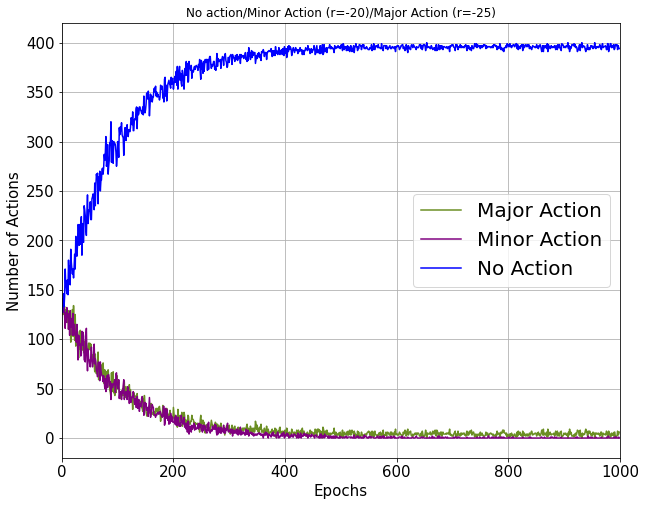

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Number of Actions", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(major_count_all_3, color='olivedrab', label="Major Action")
plt.plot(minor_count_all_3, color='purple', label="Minor Action")
plt.plot(no_count_all_3, color='blue', label="No Action")
plt.title("No action/Minor Action (r=-20)/Major Action (r=-25)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium')
print(np.mean(no_count_all_3[600:1000]))
print(np.mean(major_count_all_3[0:10]))
print(np.mean(minor_count_all_3[0:10]))

155.45

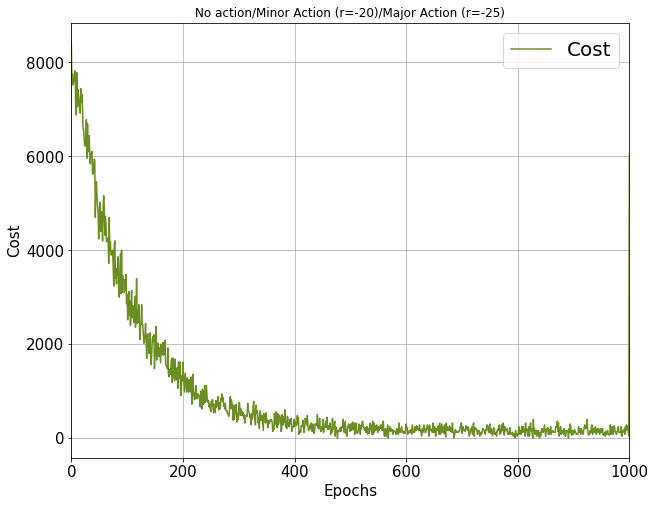

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Cost", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(cost_all_3, color='olivedrab', label="Cost")
plt.title("No action/Minor Action (r=-20)/Major Action (r=-25)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium') 
np.mean(cost_all_3[600:1000])

**No Action, Major Action(r=-25)**


In [ ]:
import numpy as np
import random
import time
from IPython.display import clear_output
import progressbar
from FooEnv4 import FooEnv4
real_time=0
env4=FooEnv4(real_time)
state_space_size = 3
action_space_size = 2
q_table = np.zeros((state_space_size,action_space_size))
num_episodes = 1000
max_steps_per_episode = 400
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 1/num_episodes
exploration_decay_rate = 0.01
rewards_all_episodes = [] 
cost_all_4= []
major_count_all_4=[]
minor_count_all_4=[]
no_count_all_4=[]
Count_step=np.array([])
for episode in range(num_episodes): 
  state = 0
  real_time = 0
  done = False #Tells us whether episode is finished
  rewards_current_episode = 0
  cost=0
  major_count=0
  minor_count=0
  no_count=0
  for step in range(max_steps_per_episode): 
    real_time=real_time+1
    exploration_rate_threshold = random.uniform(0,1)
    if state ==0:    
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 2)
    elif state ==1:
      if exploration_rate_threshold > exploration_rate:
        action = np.argmax(q_table[state,:])
      else:
        action = np.random.randint(0, 2)
    elif state ==2:
        action = 1
    new_state, reward, done = env4.update_probability_matrix(state,action,real_time)
    if reward ==0:
      no_count=no_count+1
    elif reward ==-25:
      major_count=major_count+1
    q_table[state, action] = q_table[state, action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
    state = new_state
    rewards_current_episode += reward
    cost+= -reward
    if done == True: #Checking if episode is over
      break
  print("episode {} ".format(episode))
  exploration_rate = min_exploration_rate + (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
  rewards_all_episodes.append(rewards_current_episode)
  cost_all_4.append(cost)
  Count_step = np.append(Count_step, step)
  no_count_all_4=np.append(no_count_all_4, no_count)
  major_count_all_4=np.append(major_count_all_4, major_count)
  minor_count_all_4=np.append(minor_count_all_4, minor_count)


episode 0 
episode 1 
episode 2 
episode 3 
episode 4 
episode 5 
episode 6 
episode 7 
episode 8 
episode 9 
episode 10 
episode 11 
episode 12 
episode 13 
episode 14 
episode 15 
episode 16 
episode 17 
episode 18 
episode 19 
episode 20 
episode 21 
episode 22 
episode 23 
episode 24 
episode 25 
episode 26 
episode 27 
episode 28 
episode 29 
episode 30 
episode 31 
episode 32 
episode 33 
episode 34 
episode 35 
episode 36 
episode 37 
episode 38 
episode 39 
episode 40 
episode 41 
episode 42 
episode 43 
episode 44 
episode 45 
episode 46 
episode 47 
episode 48 
episode 49 
episode 50 
episode 51 
episode 52 
episode 53 
episode 54 
episode 55 
episode 56 
episode 57 
episode 58 
episode 59 
episode 60 
episode 61 
episode 62 
episode 63 
episode 64 
episode 65 
episode 66 
episode 67 
episode 68 
episode 69 
episode 70 
episode 71 
episode 72 
episode 73 
episode 74 
episode 75 
episode 76 
episode 77 
episode 78 
episode 79 
episode 80 
episode 81 
episode 82 
episode 83 
ep

4.0725

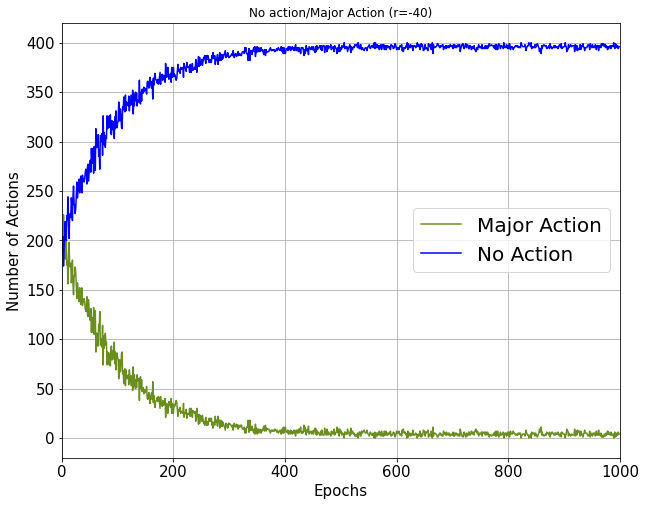

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Number of Actions", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)

plt.plot(major_count_all_4, color='olivedrab', label="Major Action")
plt.plot(no_count_all_4, color='blue', label="No Action")
plt.title("No action/Major Action (r=-25)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) # using a size in points
plt.rc('legend',fontsize='medium') # using a named size

np.mean(no_count_all_4[600:1000])
np.mean(major_count_all_4[600:1000])

101.8125

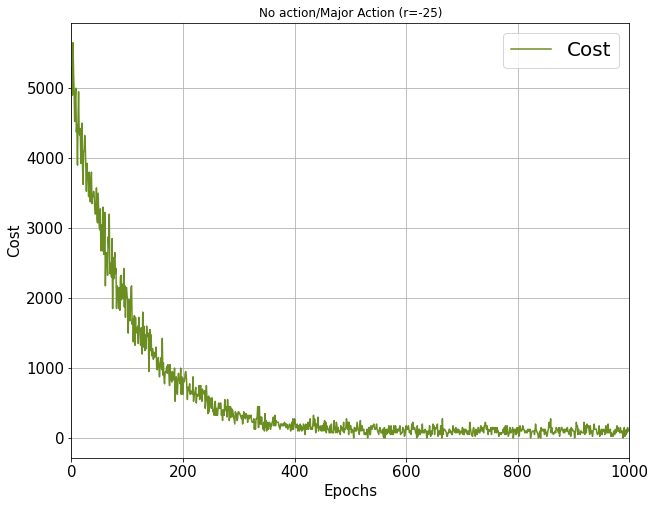

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
plt.grid()
plt.xlim(0,1000)
plt.xlabel('Epochs', fontsize = 15) 
plt.ylabel("Cost", fontsize = 15)
plt.rc('xtick',labelsize=15)
plt.rc('ytick',labelsize=15)
plt.plot(cost_all_4, color='olivedrab', label="Cost")
plt.title("No action/Major Action (r=-25)")
plt.legend(fontsize=20)
plt.rc('legend',fontsize=10) 
plt.rc('legend',fontsize='medium') 
np.mean(cost_all_4[600:1000])